## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0   5.936017  1400.523236  0.945748   8.160913  1.645515
1  84.642397   438.871869  0.175765   9.517786  0.858602
2  19.122087   785.464335  0.692954  10.055093  1.368495
3  41.671236  1561.768938  0.256927   6.026888  1.462107
4  10.911928   488.951324  0.860600   1.397537  1.582622


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0239924	total: 69.3ms	remaining: 1m 9s
1:	learn: 1.0153701	total: 70ms	remaining: 34.9s
2:	learn: 1.0065309	total: 70.6ms	remaining: 23.5s
3:	learn: 0.9962026	total: 71.3ms	remaining: 17.8s
4:	learn: 0.9853672	total: 71.8ms	remaining: 14.3s
5:	learn: 0.9745457	total: 72.2ms	remaining: 12s
6:	learn: 0.9661939	total: 72.6ms	remaining: 10.3s
7:	learn: 0.9567430	total: 73.1ms	remaining: 9.06s
8:	learn: 0.9472104	total: 73.6ms	remaining: 8.11s
9:	learn: 0.9405971	total: 74.1ms	remaining: 7.34s
10:	learn: 0.9328986	total: 74.7ms	remaining: 6.71s
11:	learn: 0.9235883	total: 75.2ms	remaining: 6.19s
12:	learn: 0.9150157	total: 75.8ms	remaining: 5.75s
13:	learn: 0.9058474	total: 76.2ms	remaining: 5.37s
14:	learn: 0.8967608	total: 76.7ms	remaining: 5.04s
15:	learn: 0.8887224	total: 77.2ms	remaining: 4.75s
16:	learn: 0.8813095	total: 77.5ms	remaining: 4.48s
17:	learn: 0.8735178	total: 77.9ms	remaining: 4.25s
18:	learn: 0.8682646	total: 78.3ms	remaining: 4.

92:	learn: 0.5101611	total: 109ms	remaining: 1.06s
93:	learn: 0.5075335	total: 110ms	remaining: 1.05s
94:	learn: 0.5045202	total: 110ms	remaining: 1.05s
95:	learn: 0.5015742	total: 110ms	remaining: 1.04s
96:	learn: 0.4995058	total: 111ms	remaining: 1.03s
97:	learn: 0.4967755	total: 111ms	remaining: 1.02s
98:	learn: 0.4940817	total: 112ms	remaining: 1.01s
99:	learn: 0.4909516	total: 112ms	remaining: 1.01s
100:	learn: 0.4880199	total: 112ms	remaining: 999ms
101:	learn: 0.4855650	total: 113ms	remaining: 992ms
102:	learn: 0.4829530	total: 113ms	remaining: 984ms
103:	learn: 0.4808016	total: 113ms	remaining: 976ms
104:	learn: 0.4774889	total: 114ms	remaining: 969ms
105:	learn: 0.4746510	total: 114ms	remaining: 964ms
106:	learn: 0.4713299	total: 115ms	remaining: 958ms
107:	learn: 0.4686666	total: 115ms	remaining: 952ms
108:	learn: 0.4659202	total: 116ms	remaining: 947ms
109:	learn: 0.4626798	total: 116ms	remaining: 942ms
110:	learn: 0.4601215	total: 117ms	remaining: 936ms
111:	learn: 0.457651

277:	learn: 0.2382796	total: 186ms	remaining: 484ms
278:	learn: 0.2378293	total: 187ms	remaining: 483ms
279:	learn: 0.2372284	total: 187ms	remaining: 482ms
280:	learn: 0.2361498	total: 188ms	remaining: 481ms
281:	learn: 0.2356896	total: 188ms	remaining: 479ms
282:	learn: 0.2353334	total: 188ms	remaining: 477ms
283:	learn: 0.2349481	total: 189ms	remaining: 476ms
284:	learn: 0.2345102	total: 189ms	remaining: 475ms
285:	learn: 0.2340794	total: 190ms	remaining: 474ms
286:	learn: 0.2336920	total: 190ms	remaining: 472ms
287:	learn: 0.2331880	total: 190ms	remaining: 471ms
288:	learn: 0.2327678	total: 191ms	remaining: 470ms
289:	learn: 0.2323544	total: 191ms	remaining: 469ms
290:	learn: 0.2318168	total: 192ms	remaining: 467ms
291:	learn: 0.2312941	total: 192ms	remaining: 466ms
292:	learn: 0.2309632	total: 193ms	remaining: 465ms
293:	learn: 0.2302081	total: 193ms	remaining: 464ms
294:	learn: 0.2298802	total: 194ms	remaining: 463ms
295:	learn: 0.2294913	total: 194ms	remaining: 462ms
296:	learn: 

530:	learn: 0.1313807	total: 290ms	remaining: 257ms
531:	learn: 0.1312327	total: 291ms	remaining: 256ms
532:	learn: 0.1307496	total: 291ms	remaining: 255ms
533:	learn: 0.1306040	total: 292ms	remaining: 255ms
534:	learn: 0.1301317	total: 292ms	remaining: 254ms
535:	learn: 0.1296690	total: 293ms	remaining: 253ms
536:	learn: 0.1295263	total: 293ms	remaining: 253ms
537:	learn: 0.1290643	total: 294ms	remaining: 252ms
538:	learn: 0.1288732	total: 294ms	remaining: 251ms
539:	learn: 0.1287343	total: 294ms	remaining: 251ms
540:	learn: 0.1282824	total: 295ms	remaining: 250ms
541:	learn: 0.1277096	total: 295ms	remaining: 250ms
542:	learn: 0.1275729	total: 296ms	remaining: 249ms
543:	learn: 0.1274380	total: 296ms	remaining: 248ms
544:	learn: 0.1273048	total: 296ms	remaining: 247ms
545:	learn: 0.1268644	total: 297ms	remaining: 247ms
546:	learn: 0.1263053	total: 297ms	remaining: 246ms
547:	learn: 0.1261742	total: 298ms	remaining: 245ms
548:	learn: 0.1260467	total: 298ms	remaining: 245ms
549:	learn: 

706:	learn: 0.0866400	total: 368ms	remaining: 152ms
707:	learn: 0.0862963	total: 368ms	remaining: 152ms
708:	learn: 0.0861486	total: 368ms	remaining: 151ms
709:	learn: 0.0858445	total: 369ms	remaining: 151ms
710:	learn: 0.0856607	total: 369ms	remaining: 150ms
711:	learn: 0.0855262	total: 370ms	remaining: 150ms
712:	learn: 0.0853312	total: 370ms	remaining: 149ms
713:	learn: 0.0852699	total: 370ms	remaining: 148ms
714:	learn: 0.0848734	total: 371ms	remaining: 148ms
715:	learn: 0.0846941	total: 371ms	remaining: 147ms
716:	learn: 0.0843062	total: 372ms	remaining: 147ms
717:	learn: 0.0841164	total: 372ms	remaining: 146ms
718:	learn: 0.0838443	total: 373ms	remaining: 146ms
719:	learn: 0.0835791	total: 373ms	remaining: 145ms
720:	learn: 0.0835434	total: 373ms	remaining: 144ms
721:	learn: 0.0833585	total: 374ms	remaining: 144ms
722:	learn: 0.0830750	total: 374ms	remaining: 143ms
723:	learn: 0.0828162	total: 375ms	remaining: 143ms
724:	learn: 0.0827811	total: 375ms	remaining: 142ms
725:	learn: 

951:	learn: 0.0527198	total: 472ms	remaining: 23.8ms
952:	learn: 0.0526063	total: 472ms	remaining: 23.3ms
953:	learn: 0.0524354	total: 473ms	remaining: 22.8ms
954:	learn: 0.0523464	total: 473ms	remaining: 22.3ms
955:	learn: 0.0523303	total: 474ms	remaining: 21.8ms
956:	learn: 0.0522430	total: 474ms	remaining: 21.3ms
957:	learn: 0.0522271	total: 475ms	remaining: 20.8ms
958:	learn: 0.0521164	total: 475ms	remaining: 20.3ms
959:	learn: 0.0520136	total: 476ms	remaining: 19.8ms
960:	learn: 0.0519224	total: 476ms	remaining: 19.3ms
961:	learn: 0.0517708	total: 476ms	remaining: 18.8ms
962:	learn: 0.0517551	total: 477ms	remaining: 18.3ms
963:	learn: 0.0516533	total: 477ms	remaining: 17.8ms
964:	learn: 0.0516378	total: 477ms	remaining: 17.3ms
965:	learn: 0.0515525	total: 478ms	remaining: 16.8ms
966:	learn: 0.0514632	total: 478ms	remaining: 16.3ms
967:	learn: 0.0514409	total: 479ms	remaining: 15.8ms
968:	learn: 0.0513572	total: 479ms	remaining: 15.3ms
969:	learn: 0.0512494	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

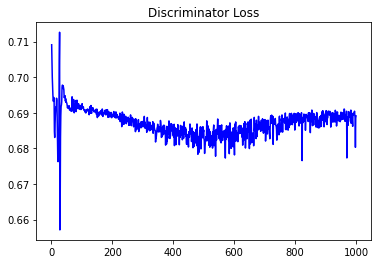

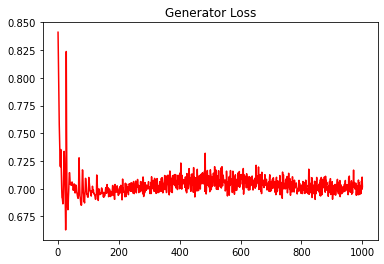

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3090112954000445


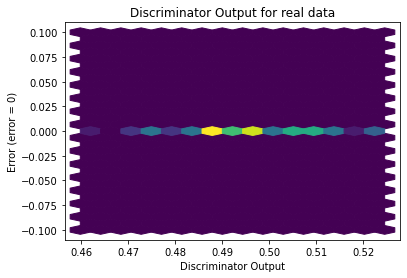

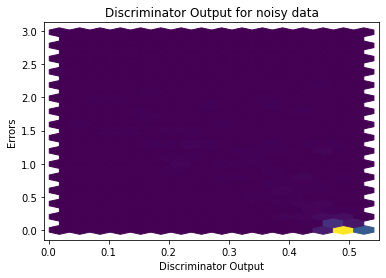

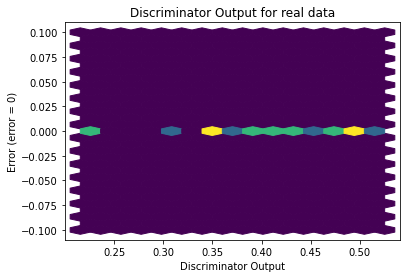

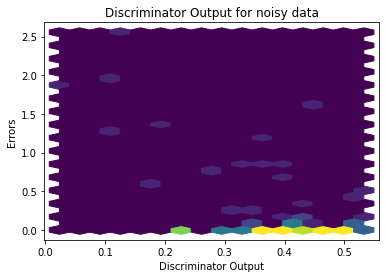

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


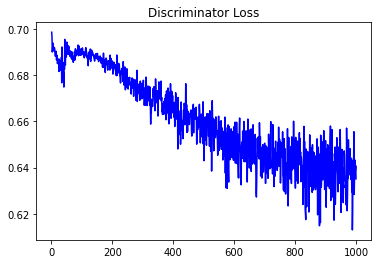

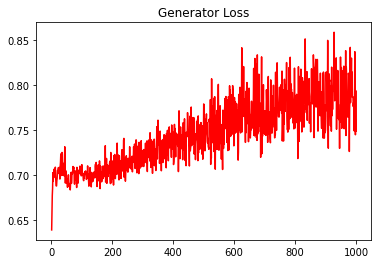

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3452002424283221


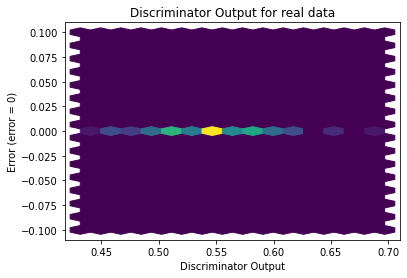

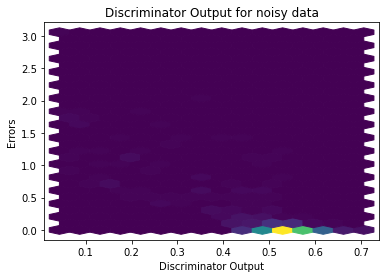

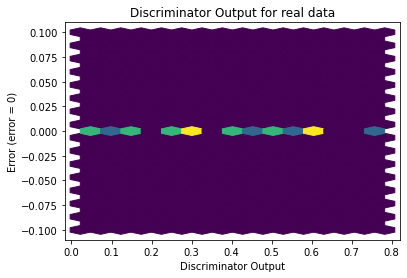

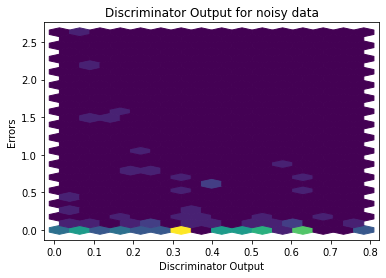

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2135]], requires_grad=True)
